# This notebook aims to measure sample tilt using intensity in DF region

In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
import cv2
from scipy import optimize
from pylab import *

import imutils
import cv2

## Test on simulation data

In [2]:
# Generate simulaton PACBED
simpath = '/srv/home/chenyu/antisite/PRISMATIC/Depth0_TiltSeries/0.1_0.5mrad/0.1_0.5mrad/'
expMask = np.zeros((69,69))
expMask[21:43,22:44] = 1
px_list = np.nonzero(expMask)
sim_cube = np.load(simpath+'depth0_slice8_110pmss.npy')
row_list = px_list[0]
col_list = px_list[1]
file_list= row_list*69+col_list+1
PACBED_sim = np.zeros((328,328))

for ifile in range(file_list.size):
    frame = sim_cube[row_list[ifile],col_list[ifile],:,:]
    PACBED_sim = PACBED_sim + frame
    
PACBED_sim = PACBED_sim / file_list.size / 22

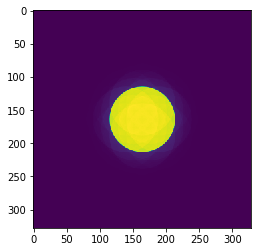

In [3]:
plt.imshow(PACBED_sim)